# 2 - Introduction to Optimization and the Gradient Descent Algorithm

## How a machine learns

Machine learning techniques follow three steps to reach their solution:
- **Make a prediction** - this step involves predicting the coefficients in a function. First predictions are typically like random guesses.
- **Calculate error** - measure how good the prediction was.
- **Learn** - the step where the initial prediction was adjusted. Change the initial prediction based on the error.

After the Learn step, the machine loops back to predict using the new coefficients, calculating the errors, and adjust the prediction in the learn step. Repeat and slowly learn to obtain the least amount of error.

## Cost Functions

A major part of a machine learning process involves optimizing for a solution that has the lowest cost. An example of a cost function is the Residual Sum of Squares, with the formula given below:

- For a given linear regression equation:  

### $$ h_\theta(x) = \theta_0 + \theta_1 x $$  

- Find the optimal values of $\theta_0$ and $\theta_1$ to minimize the Residual Sum of Squares given below:

### $$ \text{RSS} = \sum_{i=1}^{n} \left( y_i - h_\theta(x_i) \right)^2 $$

## Example 1: Simple Cost Function

### $$ f(x) = x^2 + x + 1 $$

### Imports and Packages

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Code to display matplotlib inside the notebook - not in a separate web page
%matplotlib inline

### Defining Functions and Generating Data

In [101]:
# Make a function
def f(x):
    return x**2 + x + 1

In [103]:
# Generate data
x_1 = np.linspace(start=-3, stop=3, num=100) 

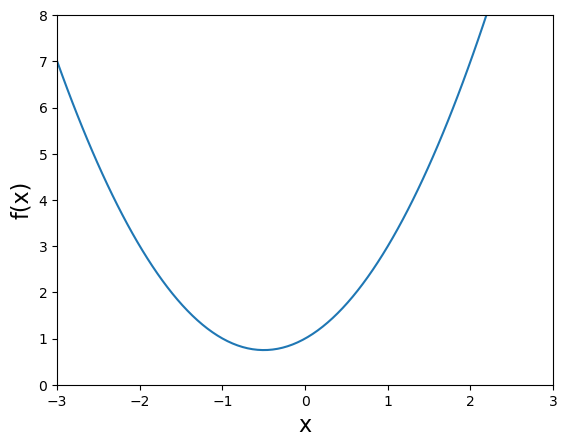

In [105]:
# Plot the function
y_1 = f(x_1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, y_1)
plt.show()

Let's observe the value at x = 2. At the point, the cost is still decreasing a lot. At x = 1, the cost is still decreasing - but not a lot. Going down further to about -0.5, the cost seems to have reached the minimum, and it seems not to go down even further. Going to x = -1, the cost now becomes higher. The slope or steepness of the function indicates when the minimum cost was reached. When slope stops changing, the cost reached the lowest value.  

### Slope and Derivatives

In [96]:
# Create a function for derivative of f(x)
def df(x):
    return 2*x + 1

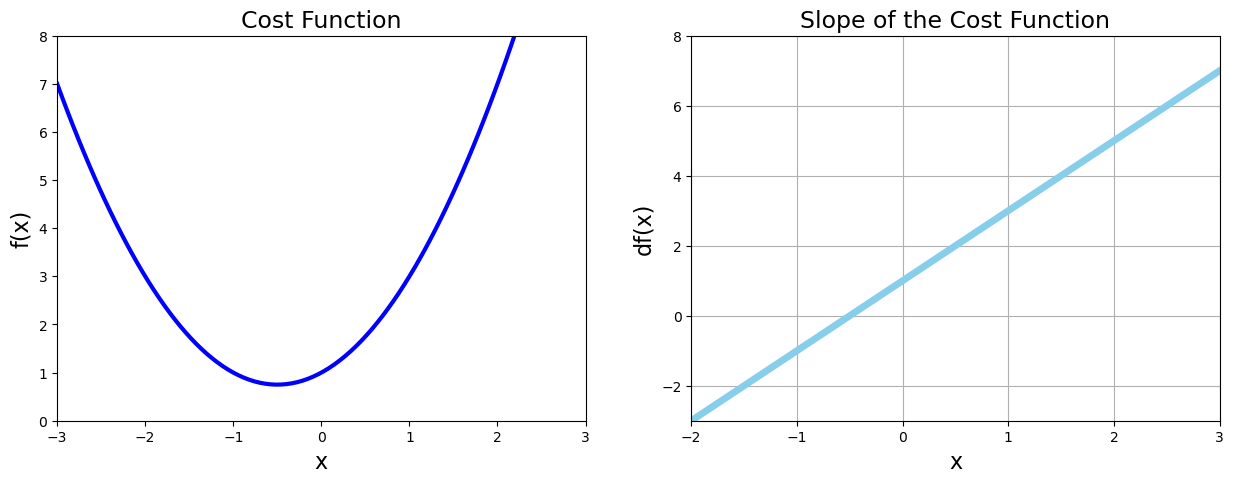

In [151]:
# Plot f(x) and df(x)

y_1 = f(x_1)
 
# First plot - f(x): Cost Function
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.plot(x_1, y_1, color='blue', linewidth=3)

# Second plot - df(x): Derivative
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim(-3, 8)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('df(x)', fontsize=14)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.grid()

plt.show()

### Gradient Descent Algorithm

Gradient descent is an optimization algorithm used to find the minimum of a function. In machine learning, it’s how models “learn” the best parameters to minimize error or loss.

Think of gradient descent as a way to find the lowest point in a mountainous landscape (the minimum of a function). Imagine standing somewhere on the mountain slope, and you want to reach the valley. Gradient descent tells you:
- Which direction to move
- How big of a step to take

The Gradient Descent Formula is as follows:

#### $$\theta_{\text{new}} = \theta_{\text{old}} - \eta \cdot \nabla L(\theta_{\text{old}})$$

In [332]:
# Gradient Descent

current_x = 0           # temporary value
new_x = 3               # starting point (initial guess)
learning_rate = 0.1     # learning rate (too big causes overshoot, too low might take too long)
precision = 0.00001     # how precise answer should be

# python lists to store data
x_list = [new_x]
y_list = [f(new_x)]
slope_list = [df(new_x)]

for n in range(1000):
    # 1 - predict: let previous_x be the initial guess
    previous_x = new_x

    # 2 - calculate the error: this function gets the slope at previous_x
    slope = df(previous_x)

    # 3 - learn: sets new value of x after considering the error
    new_x = previous_x - learning_rate * slope    # This is the core gradient descent formula

    # Add values to the python list for plotting
    x_list.append(new_x)
    y_list.append(f(new_x))
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        break

print(f"> Local minimum occurs at: {new_x}\n> Slope at x = {new_x} is: {df(new_x)}\n> f(x) or cost at this point is: {f(new_x)} \n> Loop ran: {n} times")

> Local minimum occurs at: -0.49996003706460423
> Slope at x = -0.49996003706460423 is: 7.992587079153068e-05
> f(x) or cost at this point is: 0.7500000015970362 
> Loop ran: 50 times


#### Visualizing the Gradient Descent Algorithm for Example 1

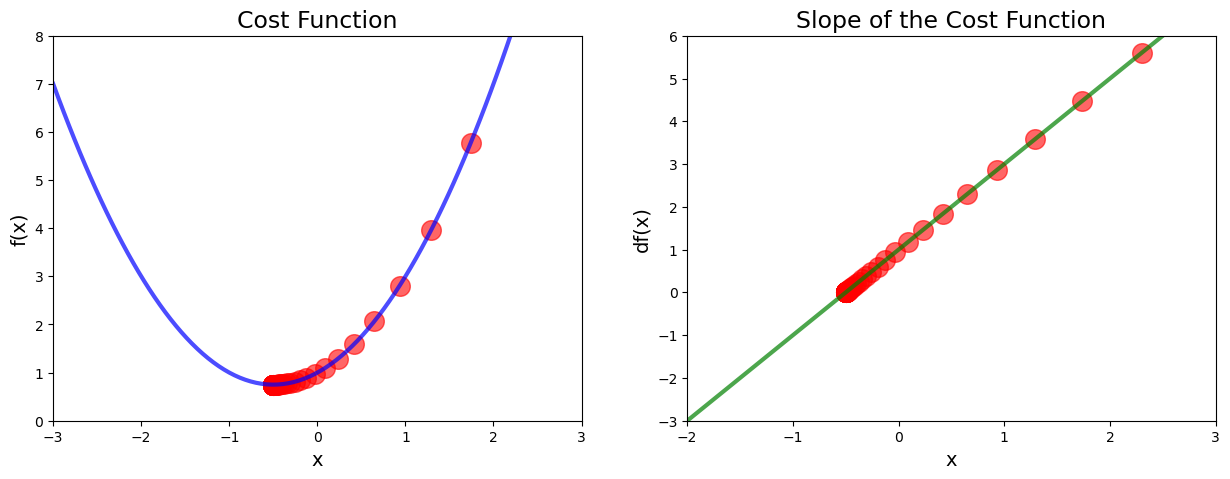

In [407]:
plt.figure(figsize=[15, 5])

# 1 - Cost Function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=17)
plt.plot(x_1, y_1, color='blue', linewidth=3, alpha=0.7)
plt.xlabel('x', fontsize=14)
plt.xlim(-3, 3)
plt.ylabel('f(x)', fontsize=14)
plt.ylim(0, 8)
plt.scatter(x_list, y_list, color='red', s=200, alpha=0.6)


# 2 - Slope of the Cost Function
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.xlim(-2, 3)
plt.ylabel("df(x)", fontsize=14)
plt.ylim(-3, 6)
plt.scatter(x_list, slope_list, color='red', s=200, alpha=0.6)
plt.plot(x_1, df(x_1), color='green', linewidth=3, alpha=0.7)


plt.show()